### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
# Check for missing values
data_missing_values = data.isnull().sum()

print(data_missing_values)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [5]:
#Visualization from above - 
# Missing data: With approximately 99% of the values for 'car' being blank it isn't really adding much value to the dataset. The other columns missing values are missing so few values (i.e. less than 2%) that I am assuming this will not have a significant impact overall.

In [7]:
# Check for duplicate rows
data_duplicates = data.duplicated().sum()

print('Duplicate rows: ', data_duplicates)

Duplicate rows:  74


In [ ]:
#Visualization from above - 
# There are 74 duplicate rows. This is survey, and it is quite possible that there will be duplicates. We will keep the duplicates as we are interested in every response.

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
# Drop the car column
print(data.shape)
data = data.drop(columns=['car'])
print(data.shape)

(12684, 26)
(12684, 25)


4. What proportion of the total observations chose to accept the coupon?



In [9]:
print(data['Y'].value_counts())
print(type(data['Y'].value_counts()))

Y
1    7210
0    5474
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [10]:
print('# coupons accepted: ',data['Y'].value_counts()[1])
print('# coupons total: ',data.shape[0])

# Proportion of accepted vs total
accepted_vs_total = data['Y'].value_counts()[1]/data.shape[0]

print('Proportion of the total observations that chose to accept the coupon: ', accepted_vs_total)

# coupons accepted:  7210
# coupons total:  12684
Proportion of the total observations that chose to accept the coupon:  0.5684326710816777


In [ ]:
#Visualization from above - 
# The coupon was accepted approximately 57% of the time.

5. Use a bar plot to visualize the `coupon` column.

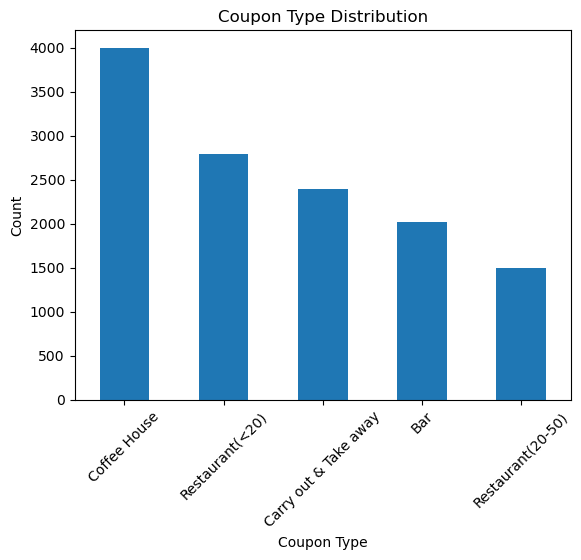

In [11]:
# Visualize the coupon column using a bar plot
data['coupon'].value_counts().plot(kind='bar')
plt.title('Coupon Type Distribution')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

6. Use a histogram to visualize the temperature column.

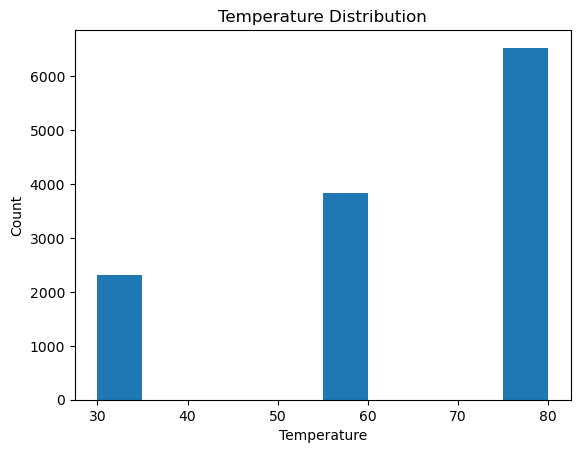

In [12]:
data['temperature'].hist()
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.grid(False)
plt.show()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [13]:
# Build bar coupon DataFrame
data_bar_coupon = data[data['coupon']=='Bar']

2. What proportion of bar coupons were accepted?


In [14]:
# Evaluate value_counts on Y column
print(data_bar_coupon['Y'].value_counts())
print(type(data_bar_coupon['Y'].value_counts()))

Y
0    1190
1     827
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


In [15]:
print('# Bar coupons accepted: ',data_bar_coupon['Y'].value_counts()[1])
print('# Bar coupons total: ',data_bar_coupon.shape[0])

# Proportion of accepted vs total
bar_accepted_vs_total = data_bar_coupon['Y'].value_counts()[1]/data_bar_coupon.shape[0]

print('Proportion of the total observations that chose to accept the coupon: ', bar_accepted_vs_total)

# Bar coupons accepted:  827
# Bar coupons total:  2017
Proportion of the total observations that chose to accept the coupon:  0.41001487357461575


In [ ]:
#Visualization from above - 
# The bar coupon was accepted approximately 41% of the time.

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [16]:
# Filter the dataset based on the frequency of going to a bar
data_bar_3_or_less = data_bar_coupon[data_bar_coupon['Bar'].isin(['never', 'less1', '1~3'])]
data_bar_more_than_3 = data_bar_coupon[data_bar_coupon['Bar'].isin(['4~8', 'gt8'])]

# Calculate acceptance rates for both groups
acceptance_rate_3_or_less = data_bar_3_or_less['Y'].mean()
acceptance_rate_more_than_3 = data_bar_more_than_3['Y'].mean()

print('Acceptance Rate for 3 or fewer times a month:', acceptance_rate_3_or_less)
print('Acceptance Rate for more than 3 times a month:', acceptance_rate_more_than_3)

Acceptance Rate for 3 or fewer times a month: 0.37061769616026713
Acceptance Rate for more than 3 times a month: 0.7688442211055276


In [ ]:
#Visualization from above - 
# The bar coupon was accepted approximately 37% of the time by people who went to the bar 3 or fewer times a month.
# The bar coupon was accepted approximately 76% of the time by people who went to the bar more than 3 times a month.

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [18]:
# Need to handle 'below21' and '50plus' values in the 'age' column - set 'below21' = 20 and '50plus' = 50 
# Add new column 'age_numeric' with numeric values for age 
data['age_numeric'] = data['age'].replace({'below21': 20, '50plus': 50}).astype(int)

# Refresh bar coupon slice to incorporate age_numeric column
data_bar_coupon = data[data['coupon']=='Bar']

# Filter the dataset for drivers who go to a bar more than once a month and are over the age of 25
data_target_group = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_numeric'] > 25)]

# Filter the dataset for all others
data_other_group = data_bar_coupon[~((data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_numeric'] > 25))]

# Calculate acceptance rates for both groups
acceptance_rate_target_group = data_target_group['Y'].mean()
acceptance_rate_other_group = data_other_group['Y'].mean()
print('Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25:', acceptance_rate_target_group)
print('Acceptance Rate for all others:', acceptance_rate_other_group)

Acceptance Rate for drivers who go to a bar more than once a month and are over the age of 25: 0.6952380952380952
Acceptance Rate for all others: 0.33500313087038197


In [ ]:
#Visualization from above - 
# The bar coupon was accepted approximately 70% of the time by drivers who go to the bar more than once a month and are over the age of 25.
# The bar coupon was accepted approximately 34% of the time by all other drivers.
# Drivers who go to the bar more than once a month and are over 21 are more likely to accept the bar coupon.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [19]:
# Filter the dataset based on the specified conditions
filtered_data = data_bar_coupon[(data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['passanger'] != 'Kid(s)') & (~data_bar_coupon['occupation'].isin(['Farming Fishing & Forestry']))]

# Calculate acceptance rates for the filtered group
acceptance_rate_filtered = filtered_data['Y'].mean()

# Calculate acceptance rates for all others
acceptance_rate_others = data[~data.index.isin(filtered_data.index)]['Y'].mean()

print('Acceptance Rate for specified group:', acceptance_rate_filtered)
print('Acceptance Rate for all others:', acceptance_rate_others)

Acceptance Rate for specified group: 0.7132486388384754
Acceptance Rate for all others: 0.5618560949476634


In [ ]:
#Visualization from above - 
# The bar coupon was accepted approximately 71% of the time by drivers who go to the bar more than once a month, had passengers that were not a kid, and had occupations other than farming, fishing, or forestry.
# The bar coupon was accepted approximately 56% of the time by all other drivers.

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [20]:
# Filter based on the conditions provided
# Condition 1: Go to bars more than once a month, had passengers that were not a kid, and were not widowed
condition1 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['passanger'] != 'Kid(s)') & (data_bar_coupon['maritalStatus'] != 'Widowed')

# Condition 2: Go to bars more than once a month and are under the age of 30
# We've already handled the conversion of age strings to numeric values by creating and populating 'age_numeric' column on data dataframe
condition2 = (data_bar_coupon['Bar'].isin(['1~3', '4~8', 'gt8'])) & (data_bar_coupon['age_numeric'] < 30)

# Condition 3: Go to cheap restaurants more than 4 times a month and income is less than 50K 
condition3 = (data_bar_coupon['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data_bar_coupon['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))

# Apply conditions to filter data set
dbc_filtered_c1 = data_bar_coupon[condition1]
dbc_filtered_c2 = data_bar_coupon[condition2]
dbc_filtered_c3 = data_bar_coupon[condition3]

# Calculate acceptance rates
dbc_c1_acceptance_rates = dbc_filtered_c1['Y'].mean()
dbc_c2_acceptance_rates = dbc_filtered_c2['Y'].mean()
dbc_c3_acceptance_rates = dbc_filtered_c3['Y'].mean()

print('Condition 1 - acceptance rate: ',dbc_c1_acceptance_rates)
print('Condition 2 - acceptance rate: ',dbc_c2_acceptance_rates)
print('Condition 3 - acceptance rate: ',dbc_c3_acceptance_rates)

Condition 1 - acceptance rate:  0.7132486388384754
Condition 2 - acceptance rate:  0.7217391304347827
Condition 3 - acceptance rate:  0.45348837209302323


In [ ]:
#Visualization from above - 
# The bar coupon acceptance rate was approximately 71% for drivers who go to bars more than once a month, had passengers that were not a kid, and were not widowed.
# The bar coupon acceptance rate was approximately 72% for drivers hwo go to bars more than once a month and are under the age of 30.
# The bar coupon acceptance rate was approximately 45% for drivers who go to cheap restaurants more than 4 times a month and income is less than 50K

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [ ]:
# Based on the observations, we can hypothesize the following about drivers who accepted the bar coupons:

# High Frequency of Bar Visits: Drivers who frequently visit bars, especially more than 3 times a month, are significantly more likely to accept bar coupons. This suggests a strong correlation between the frequency of bar visits and the likelihood of accepting related coupons, possibly due to a higher value placed on such discounts by regular patrons.

# Age Factor: Younger drivers, particularly those under the age of 30, show a higher acceptance rate for bar coupons. This could indicate that younger demographics are more inclined towards social outings like bar visits and are more receptive to discounts associated with such activities.

# Marital Status and Occupation: Drivers who are not widowed and have occupations outside of farming, fishing, or forestry are more likely to accept bar coupons. This might reflect lifestyle or social patterns where individuals in certain occupations or marital statuses have more social engagements or value leisure activities differently.

# Economic and Dining Preferences: Drivers with specific economic and dining preferences, such as those who frequent cheap restaurants and have an income of less than 50K, have distinct acceptance rates. This could suggest that economic factors and personal dining habits influence the perceived value of bar coupons.

# General Acceptance Among Other Drivers: The relatively lower acceptance rate among "all other drivers" indicates that there are specific demographic and behavioral traits that significantly influence the likelihood of accepting bar coupons. This group likely includes drivers who do not frequently visit bars or do not fit into the specific demographic profiles outlined above.

# These hypotheses suggest that demographic factors (such as age and marital status), behavioral patterns (frequency of bar visits), economic status, and personal preferences (dining habits) play crucial roles in determining the likelihood of accepting bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [21]:
# Filter for instances where Carry Out & Take away coupons were declined
data_declined_carryout = data[(data['coupon']=='Carry out & Take away') & (data['Y']==False)]

Distribution by Age:
 age_numeric
21    19.905213
26    19.905213
31    18.325434
50    12.322275
36     9.952607
41     9.320695
46     5.371248
20     4.897314
Name: proportion, dtype: float64


C:\Users\rimim\AppData\Local\Temp\ipykernel_19268\2929927148.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=data_declined_carryout, palette='viridis', order = data_declined_carryout['age'].value_counts().index)


Text(0.5, 1.0, 'Coupon Declines by Age')

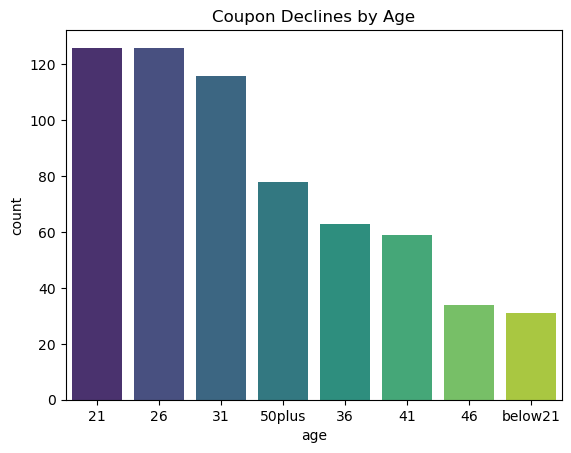

In [22]:
# Look at declines by age
distr_by_age = data_declined_carryout['age_numeric'].value_counts(normalize=True) * 100

print('Distribution by Age:\n', distr_by_age)

# plot declines by Age
sns.countplot(x='age', data=data_declined_carryout, palette='viridis', order = data_declined_carryout['age'].value_counts().index)
plt.title('Coupon Declines by Age')

Distribution by Marital Status:
 maritalStatus
Married partner      39.968404
Single               37.124803
Unmarried partner    17.535545
Divorced              4.739336
Widowed               0.631912
Name: proportion, dtype: float64


C:\Users\rimim\AppData\Local\Temp\ipykernel_19268\2166320458.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='maritalStatus', data=data_declined_carryout, palette='viridis', order = data_declined_carryout['maritalStatus'].value_counts().index)


Text(0.5, 1.0, 'Coupon Declines by Marital Status')

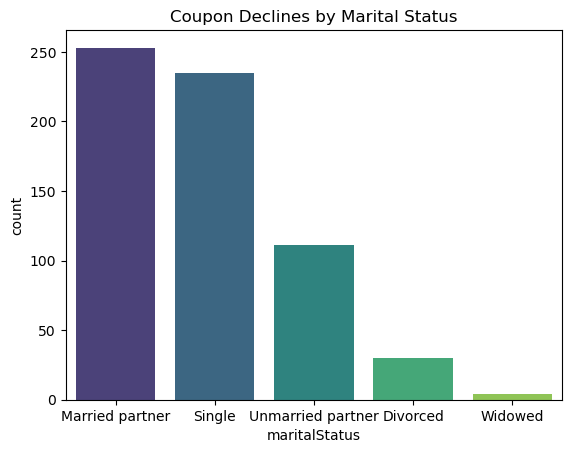

In [24]:
# Look at declines by marital status
distr_by_marital_status = data_declined_carryout['maritalStatus'].value_counts(normalize=True) * 100

print('Distribution by Marital Status:\n', distr_by_marital_status)

sns.countplot(x='maritalStatus', data=data_declined_carryout, palette='viridis', order = data_declined_carryout['maritalStatus'].value_counts().index)
plt.title('Coupon Declines by Marital Status')

Distribution by Education:
 education
Bachelors degree                          36.650869
Some college - no degree                  30.015798
Graduate degree (Masters or Doctorate)    19.589258
High School Graduate                       7.266983
Associates degree                          6.319115
Some High School                           0.157978
Name: proportion, dtype: float64


C:\Users\rimim\AppData\Local\Temp\ipykernel_28488\1481456186.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='education', data=data_declined_carryout, palette='viridis', order = data_declined_carryout['education'].value_counts().index)


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Bachelors degree'),
  Text(1, 0, 'Some college - no degree'),
  Text(2, 0, 'Graduate degree (Masters or Doctorate)'),
  Text(3, 0, 'High School Graduate'),
  Text(4, 0, 'Associates degree'),
  Text(5, 0, 'Some High School')])

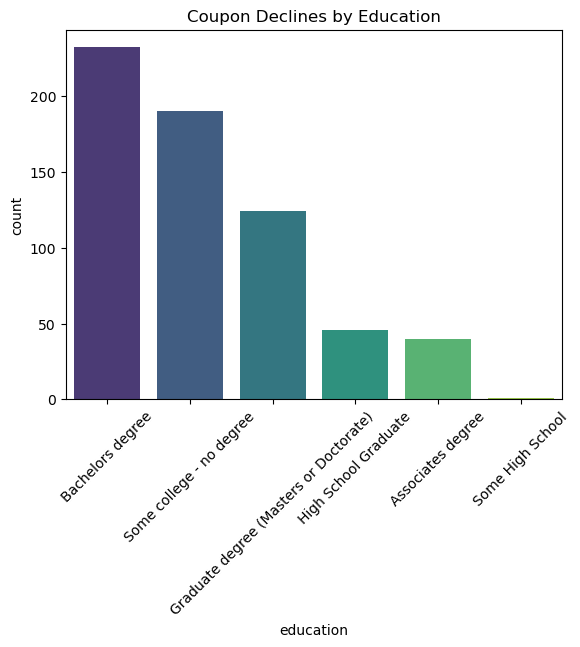

In [25]:
# Look at declines by education
distr_by_education = data_declined_carryout['education'].value_counts(normalize=True) * 100

print('Distribution by Education:\n', distr_by_education)

sns.countplot(x='education', data=data_declined_carryout, palette='viridis', order = data_declined_carryout['education'].value_counts().index)
plt.title('Coupon Declines by Education')
plt.xticks(rotation=45)

In [ ]:
# Observations
# Age: The age groups of 21 and 26 years old are the most likely to decline Carry Out & Take away coupons, each constituting approximately 20% of the declines. This suggests that younger adults in their early to mid-twenties are more inclined to decline these coupons.

# Marital Status: The majority of declines come from individuals with a married partner (approximately 40%) and singles (approximately 37%). This indicates that marital status, particularly being married or single, plays a significant role in the likelihood of declining Carry Out & Take away coupons.

# Education: Individuals with a Bachelor's degree are the most likely to decline these coupons, making up approximately 37% of the declines, followed by those with some college but no degree (approximately 30%). This suggests a higher tendency to decline among those with higher education levels.
